* Demonstrate the different characteristics of the distribution of the page rank 
for the Erdösz/Renyi model compared to the Barabasi/Albert graph model 
in an example (e.g. generate random graph/s with similar number of nodes and edges for each model,
compute page rank and compare characteristics of the resulting value distribution
such as moments).

# Distribution Characteristics

* Central tendency: 
    This refers to the "center" of the distribution, or the typical or average value around which the data tend to cluster. Measures of central tendency include the mean, median, and mode.

* Spread or dispersion: 
    This refers to the degree to which the data are spread out or clustered together. Measures of spread include the standard deviation, variance, and range.

* Skewness: 
    This refers to the degree of asymmetry of the distribution. A distribution can be positively skewed (where the tail on the right side of the distribution is longer), negatively skewed (where the tail on the left side of the distribution is longer), or have zero skewness (where the distribution is symmetric).

* Kurtosis: 
    This refers to the "peakedness" of the distribution. A distribution can be leptokurtic (more peaked than a normal distribution), mesokurtic (similarly peaked to a normal distribution), or platykurtic (less peaked than a normal distribution).

* Range of values: 
    This refers to the set of values that the variable can take, and is often denoted by the minimum and maximum values of the distribution.

# Erdösz/Renyi

* Distribution: poisson

* homogenous (all nodes have the same degree)

* diameter: $\ln(N)$

* clustering coefficient: $N^{-1}$

# Barabasi/Albert

* Distribution: powerlaw

* inhomogenous (nodes have different degrees, few nodes have high degree (hubs), many nodes have low degree (non-hubs))

* diameter: $\frac{\ln(N)}{\ln\ln(N)}$

* A clustering coefficient: $N^{-0.75}$

* scale free property, to characteristics of the network can be observed at any scales

* small world property, the network is small world if the average shortest path length is close to the diameter

In [13]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pydot
from scipy import stats

In [14]:
nodes = 10000
edges = 100000

In [15]:
# Generate an Erdős/Rényi graph
er_graph = nx.gnm_random_graph(nodes, edges, seed=42)
print("Number of nodes: ", len(er_graph.nodes()))
print("Number of edges: ", len(er_graph.edges()))

Number of nodes:  10000
Number of edges:  100000


In [16]:
# Generate a Barabási/Albert graph
ba_graph = nx.barabasi_albert_graph(nodes, int(edges/nodes), seed=42)
print("Number of nodes: ", len(ba_graph.nodes()))
print("Number of edges: ", len(ba_graph.edges()))

Number of nodes:  10000
Number of edges:  99900


In [17]:
# Code to plot the graphs
# er_pydot = nx.nx_pydot.to_pydot(er_graph)
# ba_pydot = nx.nx_pydot.to_pydot(ba_graph)

# er_pydot.write_png('er_graph.png')
# ba_pydot.write_png('ba_graph.png')

In [18]:
# Compute PageRank for each node in each graph
er_pagerank = nx.pagerank(er_graph)
ba_pagerank = nx.pagerank(ba_graph)

In [19]:
# Compute the distributions of PageRank values
er_distribution = np.array(list(er_pagerank.values()))
ba_distribution = np.array(list(ba_pagerank.values()))

In [20]:
# Central Tendency Measures
er_mean = np.mean(er_distribution)
ba_mean = np.mean(ba_distribution)

er_median = np.median(er_distribution)
ba_median = np.median(ba_distribution)

er_mode = stats.mode(er_distribution, keepdims=True)
ba_mode = stats.mode(ba_distribution, keepdims=True)

print("Erdős-Rényi Graph")
print("Mean:   ", er_mean)
print("Median: ", er_median)
print("Mode:   ", er_mode.mode[0])

print("Barabási-Albert Graph")
print("Mean:   ", ba_mean)
print("Median: ", ba_median)
print("Mode:   ", ba_mode.mode[0])

Erdős-Rényi Graph
Mean:    0.0001
Median:  9.963849444818369e-05
Mode:    4.480751898266119e-05
Barabási-Albert Graph
Mean:    0.0001
Median:  7.436465082067949e-05
Mode:    5.365837605218124e-05


In [21]:
# Dispersion Measures
er_std = np.std(er_distribution)
ba_std = np.std(ba_distribution)

er_var = np.var(er_distribution)
ba_var = np.var(ba_distribution)

er_range = np.max(er_distribution) - np.min(er_distribution)
ba_range = np.max(ba_distribution) - np.min(ba_distribution)

print("Erdős-Rényi Graph")
print("Standard Deviation: ", er_std)
print("Variance:           ", er_var)
print("Range:              ", er_range)

print("Barabási-Albert Graph")
print("Standard Deviation: ", ba_std)
print("Variance:           ", ba_var)
print("Range:              ", ba_range)

Erdős-Rényi Graph
Standard Deviation:  1.892827912487826e-05
Variance:            3.582797506293021e-10
Range:               0.0001401100076574701
Barabási-Albert Graph
Standard Deviation:  0.00010160761203626353
Variance:            1.0324106823711843e-08
Range:               0.002609157002836119


In [22]:
# Moments > 2
er_skew = stats.skew(er_distribution)
ba_skew = stats.skew(ba_distribution)

er_kurt = stats.kurtosis(er_distribution)
ba_kurt = stats.kurtosis(ba_distribution)

er_4th = stats.moment(er_distribution, 4)
er_5th = stats.moment(er_distribution, 5)
er_6th = stats.moment(er_distribution, 6)
er_7th = stats.moment(er_distribution, 7)

ba_4th = stats.moment(ba_distribution, 4)
ba_5th = stats.moment(ba_distribution, 5)
ba_6th = stats.moment(ba_distribution, 6)
ba_7th = stats.moment(ba_distribution, 7)

print("Erdős-Rényi Graph")
print("Skewness: ", er_skew)
print("Kurtosis: ", er_kurt)

print()
print()

print("Barabási-Albert Graph")
print("Skewness: ", ba_skew)
print("Kurtosis: ", ba_kurt)

Erdős-Rényi Graph
Skewness:  0.2155272515049501
Kurtosis:  -0.0334473869995775


Barabási-Albert Graph
Skewness:  9.519935257626779
Kurtosis:  139.40191987983943


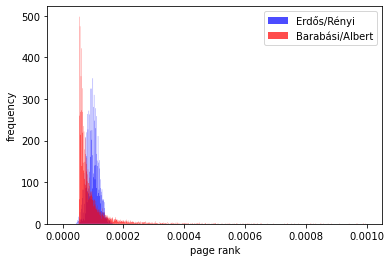

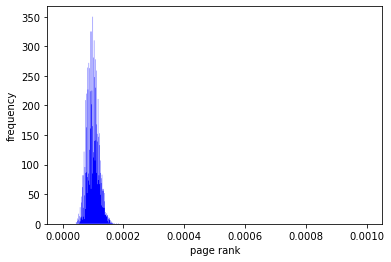

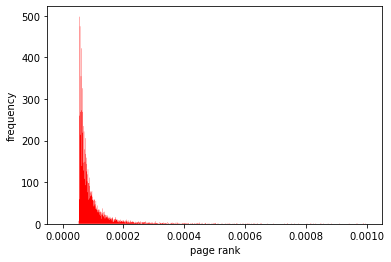

In [27]:
# Plot the distribution of PageRanks values for Erdős-Rényi and Barabási-Albert model

bins = np.linspace(0, 0.001, 1000)
# bins = np.linspace(0, 10/nodes, int(nodes/10))
histtype = 'stepfilled'

x_axis = "page rank"
y_axis = "frequency"

fig, ax = plt.subplots()
ax.set_xlabel(x_axis)
ax.set_ylabel(y_axis)
plt.hist(er_distribution, bins, histtype=histtype, alpha=0.7, label='Erdős/Rényi', color='blue')
plt.hist(ba_distribution, bins, histtype=histtype, alpha=0.7, label='Barabási/Albert', color='red')
plt.legend()
plt.savefig('both_graphs.png', dpi=300)
plt.show()

er_fig, ax = plt.subplots()
ax.set_xlabel(x_axis)
ax.set_ylabel(y_axis)
plt.hist(er_distribution, bins, histtype=histtype, label='Erdös/Rényi', color='blue')
plt.savefig('er_graph.png', dpi=300)
plt.show()

ba_fig, ax = plt.subplots()
ax.set_xlabel(x_axis)
ax.set_ylabel(y_axis)
plt.hist(ba_distribution, bins, histtype=histtype, label='Barabási/Albert', color='red')
plt.savefig('ba_graph.png', dpi=300)
plt.show()